# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Fikri Kurnia
- Email: ds.fikri.kurnia@gmail.com
- Id Dicoding:

## Persiapan

### Menyiapkan library yang dibutuhkan

In [399]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib

from imblearn.over_sampling import SMOTE
from collections import Counter


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns', 50)

### Menyiapkan data yang akan diguankan

In [400]:
data = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv")

## Data Understanding

The data contains demographic details, work-related metrics and attrition flag.

- EmployeeId - Employee Identifier
- Attrition - Did the employee attrition? (0=no, 1=yes)
- Age - Age of the employee
- BusinessTravel - Travel commitments for the job
- DailyRate - Daily salary
- Department - Employee Department
- DistanceFromHome - Distance from work to home (in km)
- Education - 1-Below College, 2-College, 3-Bachelor, 4-Master,5-Doctor
- EducationField - Field of Education
- EnvironmentSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High
- Gender - Employee's gender
- HourlyRate - Hourly salary
- JobInvolvement - 1-Low, 2-Medium, 3-High, 4-Very High
- JobLevel - Level of job (1 to 5)
- JobRole - Job Roles
- JobSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High
- MaritalStatus - Marital Status
- MonthlyIncome - Monthly salary
- MonthlyRate - Mounthly rate
- NumCompaniesWorked - Number of companies worked at
- Over18 - Over 18 years of age?
- OverTime - Overtime?
- PercentSalaryHike - The percentage increase in salary last year
- PerformanceRating - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
- RelationshipSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High
- StandardHours - Standard Hours
- StockOptionLevel - Stock Option Level
- TotalWorkingYears - Total years worked
- TrainingTimesLastYear - Number of training attended last year
- WorkLifeBalance - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
- YearsAtCompany - Years at Company
- YearsInCurrentRole - Years in the current role
- YearsSinceLastPromotion - Years since the last promotion
- YearsWithCurrManager - Years with the current manager

In [401]:
data

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,4,Male,88,3,1,Human Resources,2,Married,2991,5224,0,Y,Yes,11,3,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,1,Female,61,1,2,Healthcare Representative,2,Married,4777,14382,5,Y,No,15,3,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,1,Male,34,3,1,Research Scientist,3,Married,2461,10332,9,Y,Yes,12,3,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,3,Female,77,3,4,Sales Executive,2,Married,13525,14864,5,Y,No,14,3,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,3,Female,98,3,1,Research Scientist,3,Married,2001,12549,2,Y,No,14,3,2,80,3,20,2,3,5,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,38,0.0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,1,3,Female,81,3,3,Manufacturing Director,3,Single,7861,15397,4,Y,Yes,14,3,4,80,0,10,4,4,1,0,0,0
1466,1467,50,NaN,Travel_Rarely,813,Research & Development,17,5,Life Sciences,1,4,Female,50,2,3,Research Director,1,Divorced,13269,21981,5,Y,No,15,3,3,80,3,19,3,3,14,11,1,11
1467,1468,28,1.0,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,1,3,Female,79,3,1,Laboratory Technician,4,Married,2515,22955,1,Y,Yes,11,3,4,80,0,1,4,2,1,1,0,0
1468,1469,40,0.0,Non-Travel,458,Research & Development,16,2,Life Sciences,1,3,Male,74,3,1,Research Scientist,3,Divorced,3544,8532,9,Y,No,16,3,2,80,1,6,0,3,4,2,0,0


In [402]:
data.dtypes

,0
EmployeeId,int64
Age,int64
Attrition,float64
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64


In [403]:
data['Attrition'].isnull().sum()

np.int64(412)

In [404]:
data.dropna(inplace=True)

Terdapat total 412 data pekerja yang tidak memiliki keterangan pada kolom "Attrition".Informasi ini akan ditinjau lebih lanjut

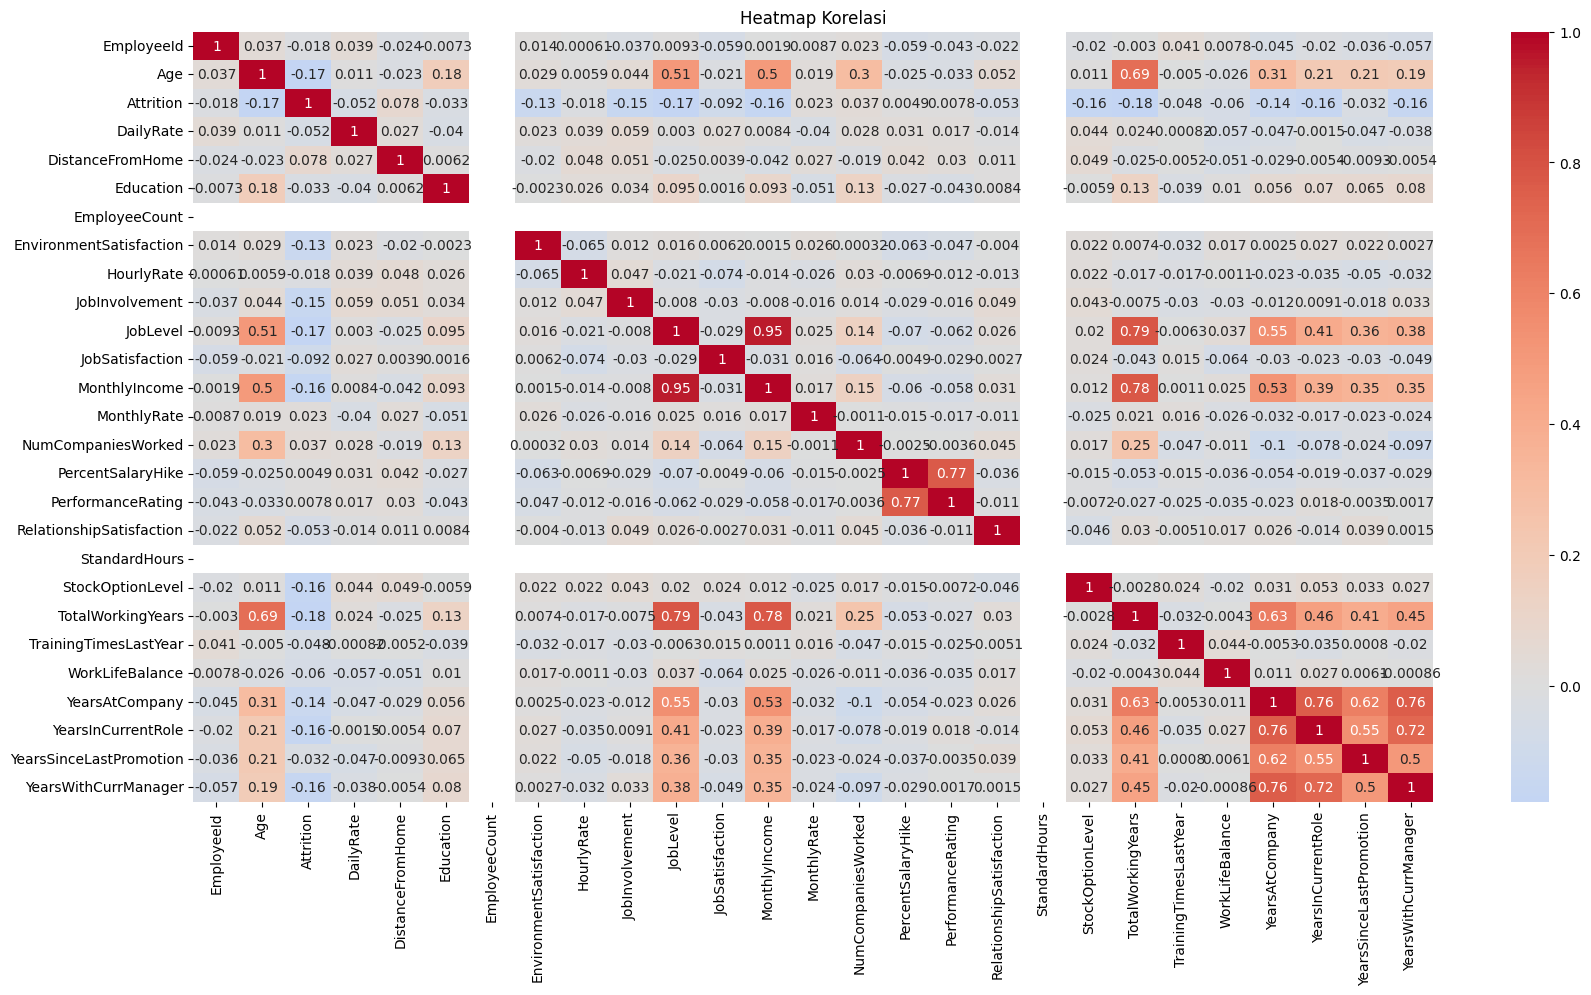

In [405]:
corr = data.select_dtypes(np.number).corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Heatmap Korelasi")
plt.show()

Dapat dilihat berdasarkan hetmap di atas terdapat beberapa fitur yang memiliki korelasi yang cukup tinggi yang mana menunjukan fitur tersebut berkemungkinan terindikasi redundant atau membentuk suatu cluster.

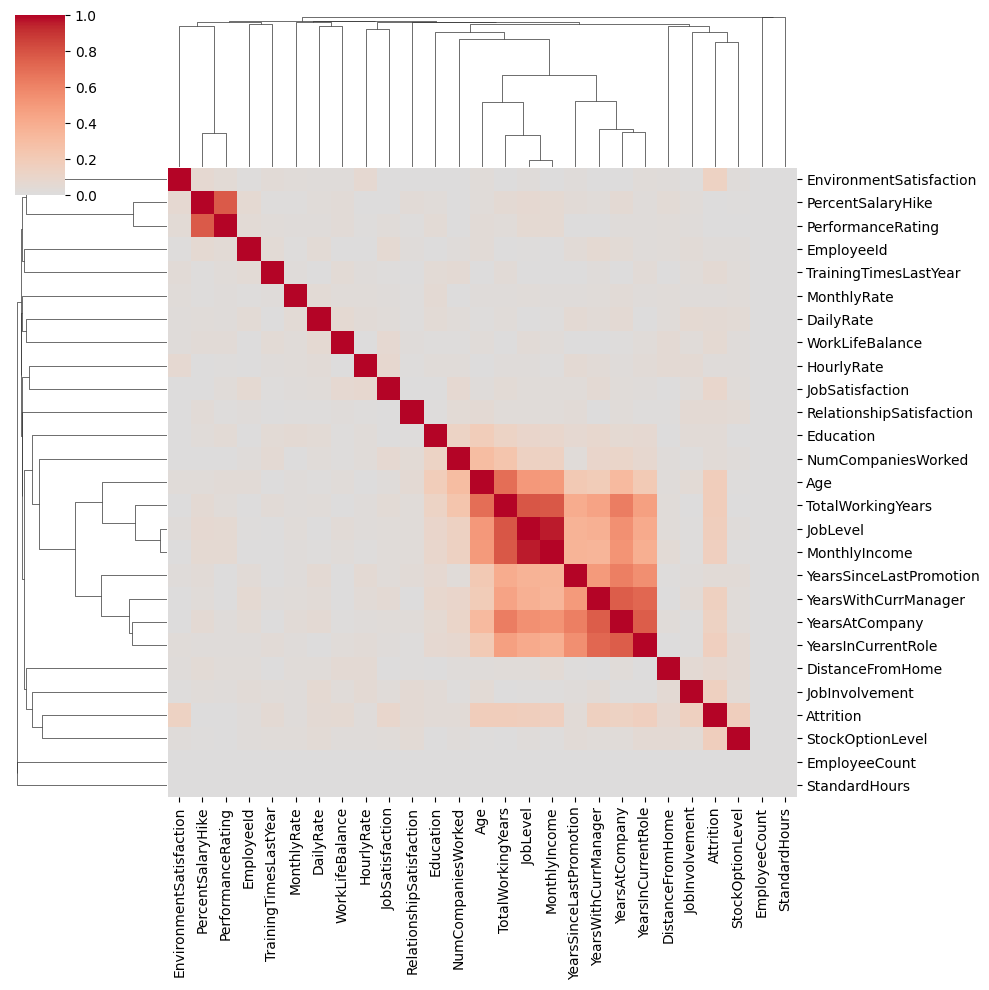

In [406]:
# Hapus baris NaN di target
data_plot = data.dropna(subset=["Attrition"])


num = data_plot.select_dtypes(include=["int64", "float64"]).copy()
corr = num.corr().abs().fillna(0)
dist = 1 - corr
np.fill_diagonal(dist.values, 0)
link = linkage(squareform(dist.values, checks=False), method="average")

# Plot clustermap
sns.clustermap(
    corr,
    row_linkage=link,
    col_linkage=link,
    cmap="coolwarm",
    center=0,
    figsize=(10, 10)
)
plt.show()

# Dapatkan cluster fitur
labels = fcluster(link, t=0.7, criterion="distance")
clusters = pd.Series(labels, index=corr.columns).groupby(labels).apply(list)

Dari potongan heatmap, terlihat fitur-fitur seperti:
- Age
- ToalWorkingYears
- JobLevel
- MontlyIncome
- YearsAtCompany
- YearsInCurrentRole
- YearsWithCurrManager
- YearsSinceLastPromotion

Semua ini berhubungan dengan senioritas/masa kerja karyawan di perusahaan.
fitur-fitur tersebut menjadi kandidat untuk melakukan PCA

## Univariate Analysis

### Feature Numeric

In [407]:
# Fitur Numerik
num_fe = data.select_dtypes(np.number).columns

### Helper Function for Visualization (Numeric)

In [408]:
def numeric_analysis(df: pd.DataFrame, feature: list[str], target=None, bins=30)->None:
    """
    Helper function untuk univariate atau bivariate analysis pada fitur numerik.

    Parameters
    ----------
    df : pandas.DataFrame
        Dataset
    feature : str
        Nama kolom numerik yang akan dianalisis
    target : str, optional
        Kolom target (misalnya 'Attrition'), default None
    bins : int
        Jumlah bin untuk histogram
    """

    fig, axes = plt.subplots(1, 3 if target else 2, figsize=(15, 4))

    sns.histplot(df[feature].dropna(), bins=bins, kde=True, ax=axes[0])
    axes[0].set_title(f"Histogram of {feature}")

    sns.boxplot(x=df[feature], ax=axes[1])
    axes[1].set_title(f"Boxplot of {feature}")

    if target:
        sns.boxplot(x=df[target], y=df[feature], ax=axes[2])
        axes[2].set_title(f"{feature} by {target}")

    plt.tight_layout()
    plt.show()

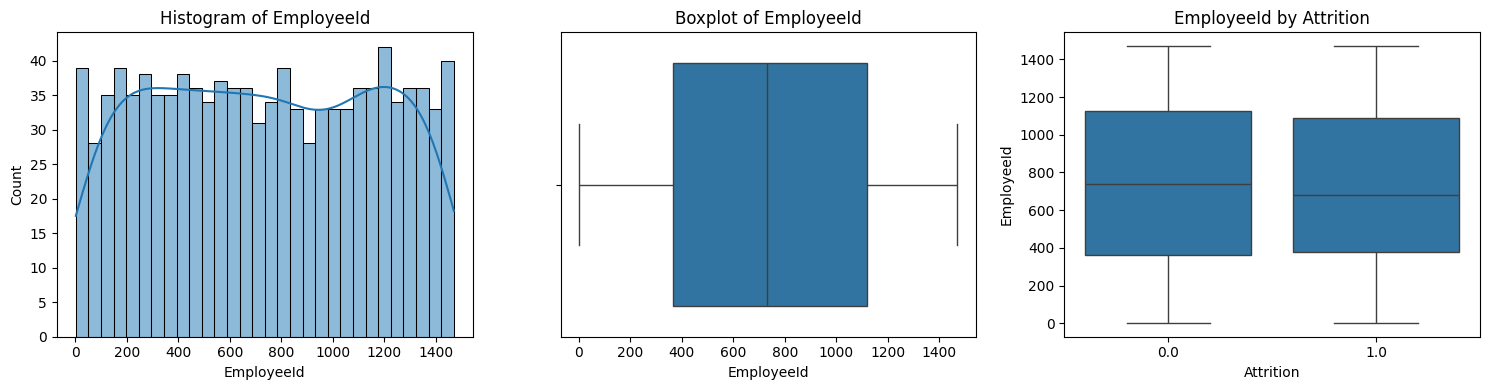

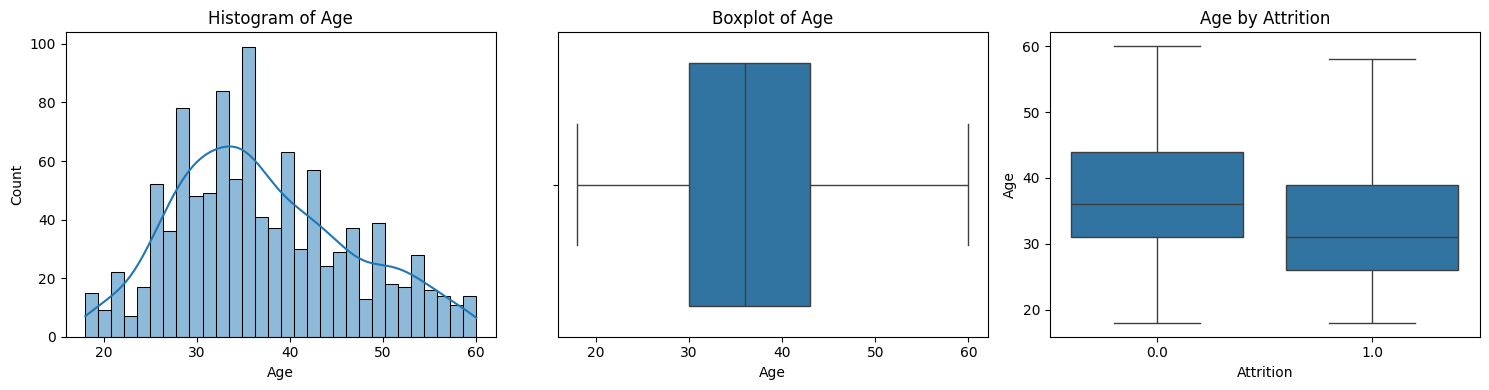

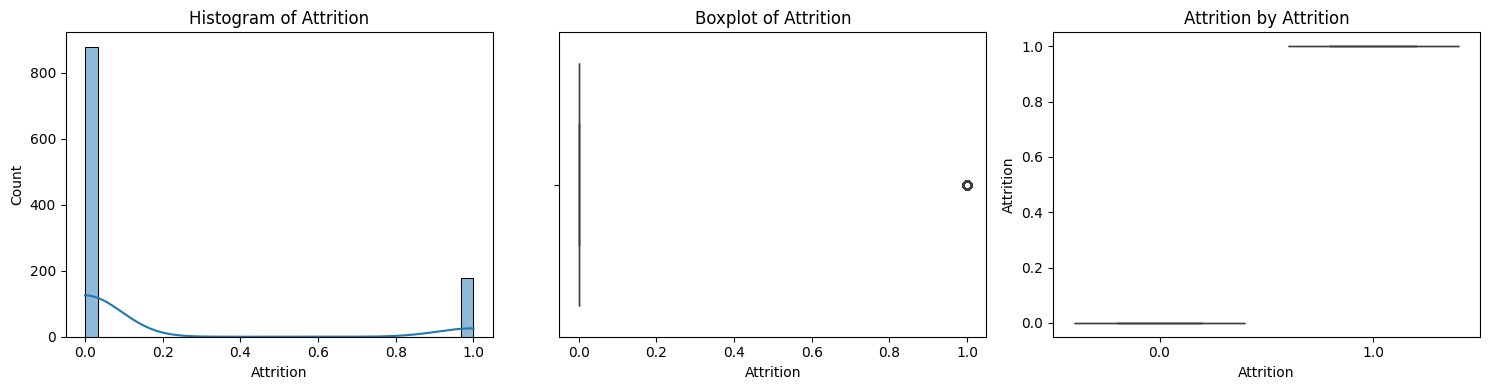

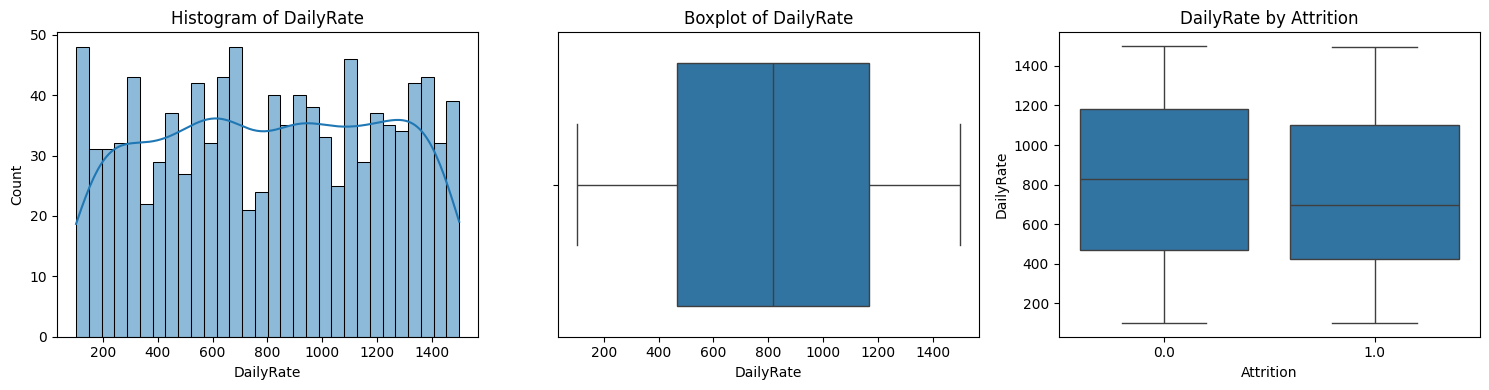

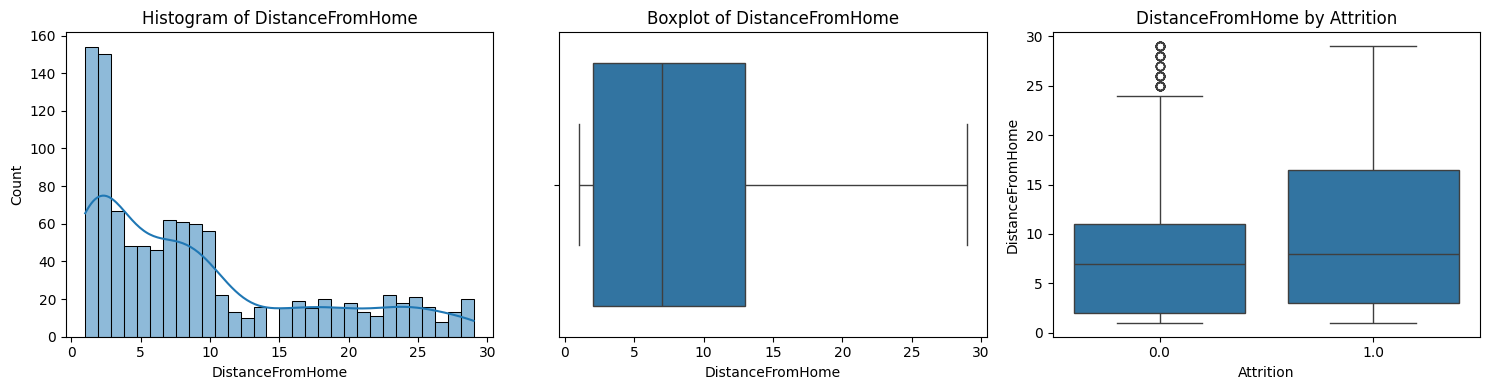

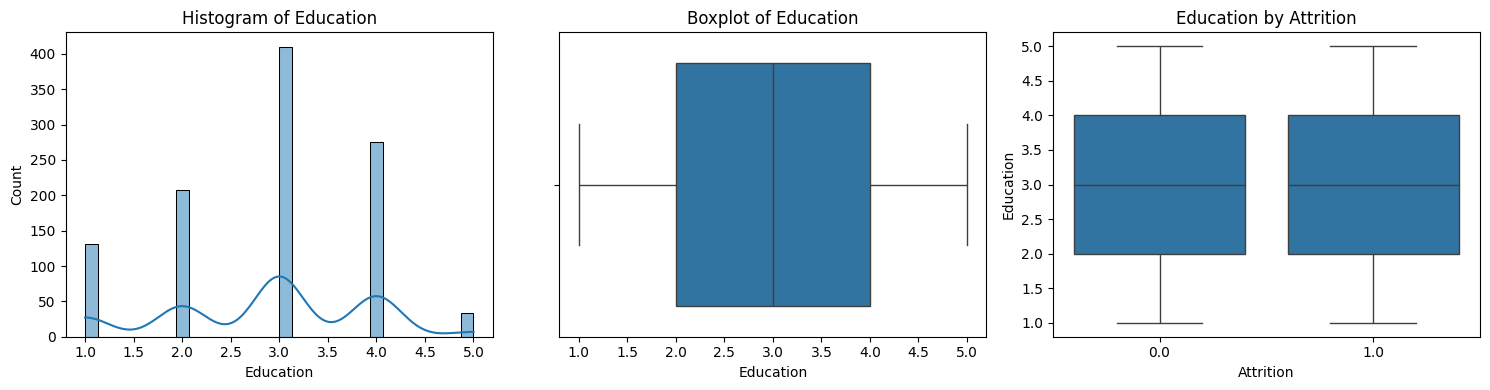

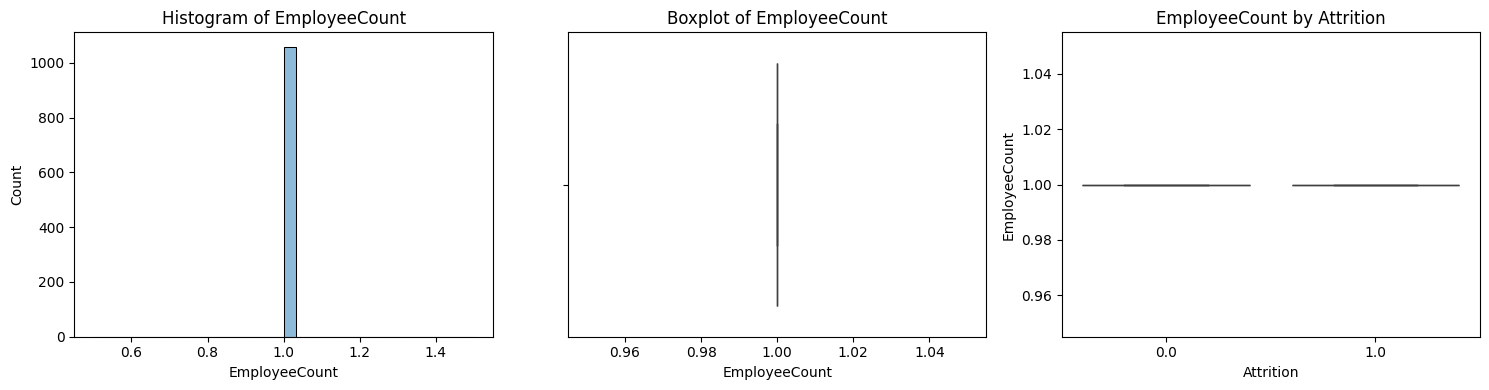

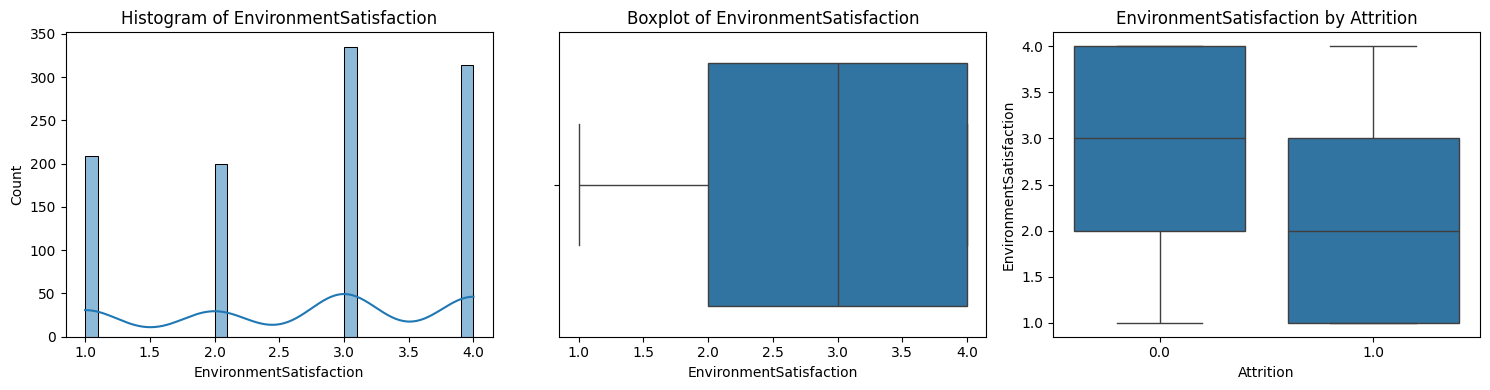

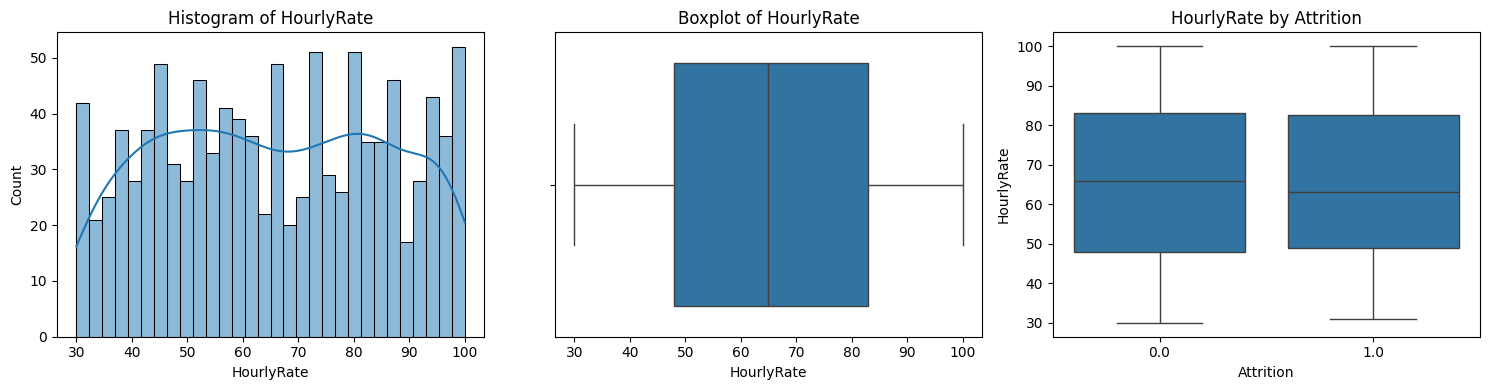

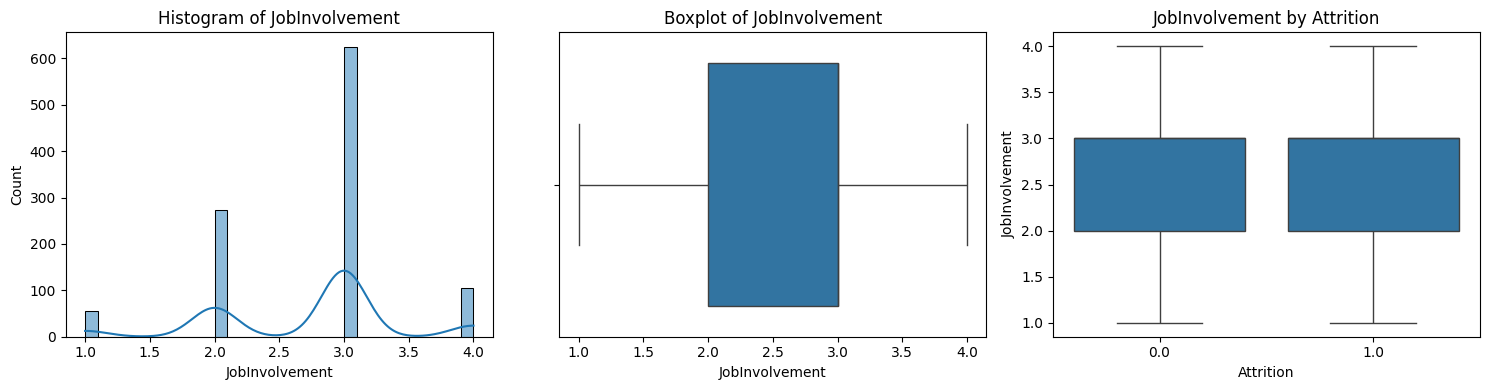

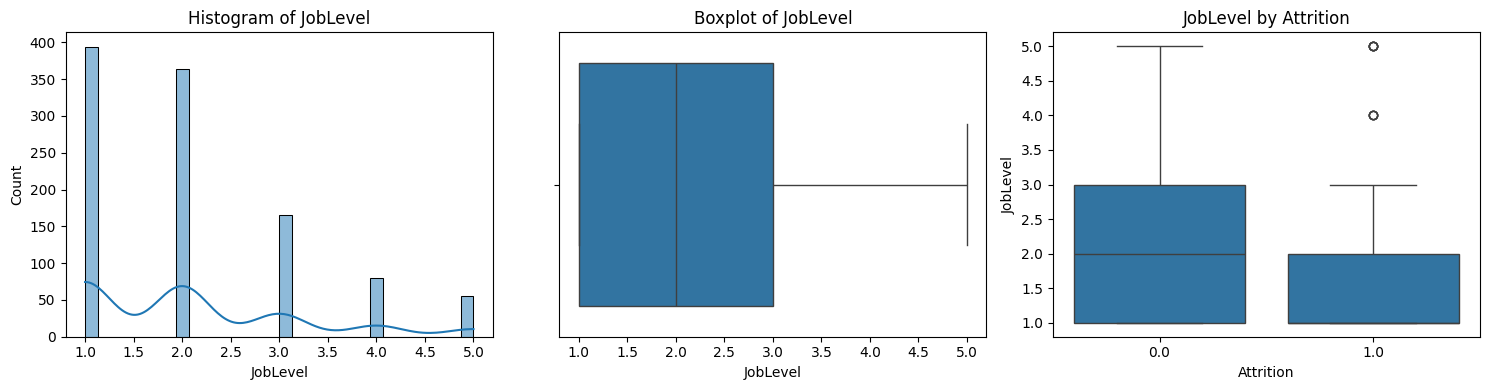

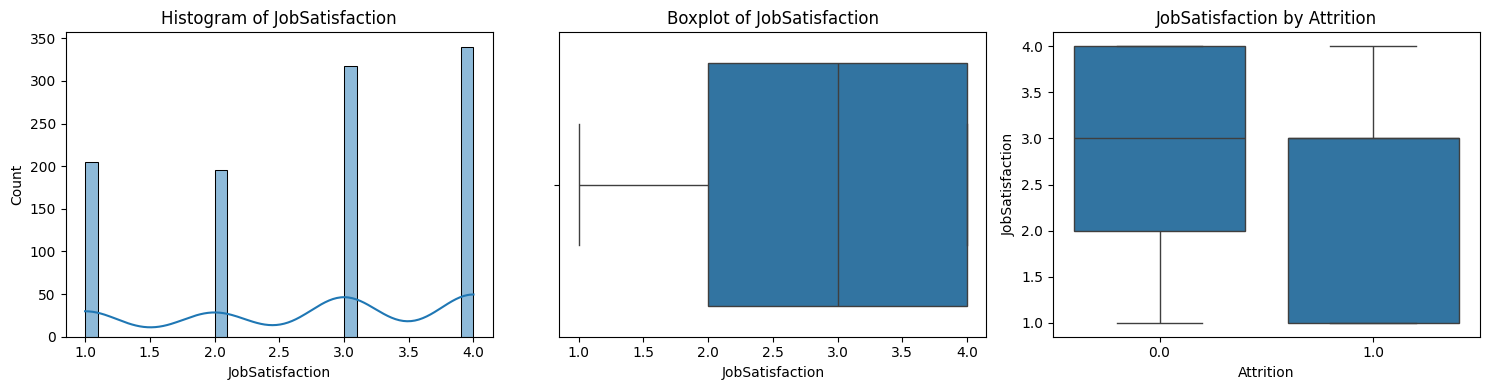

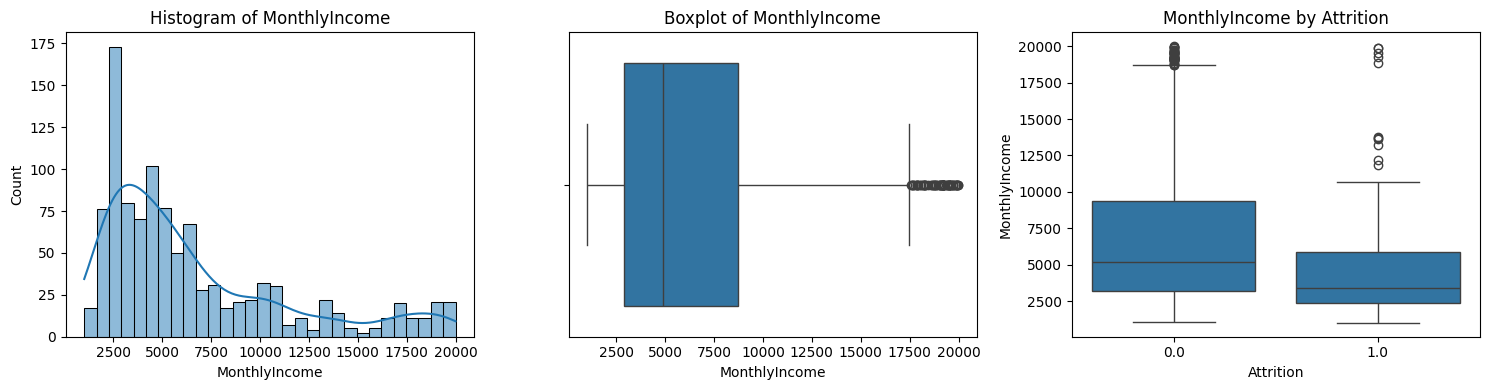

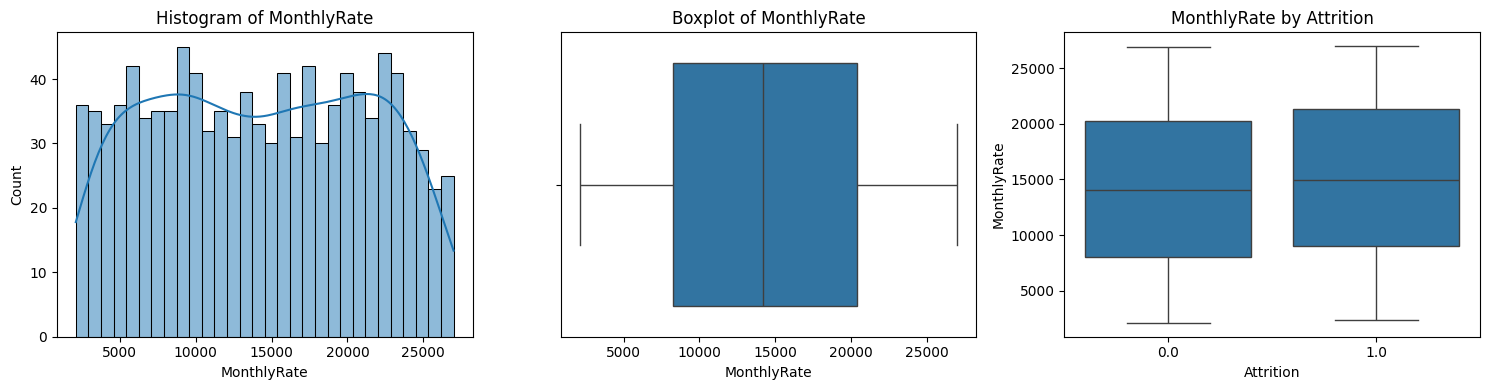

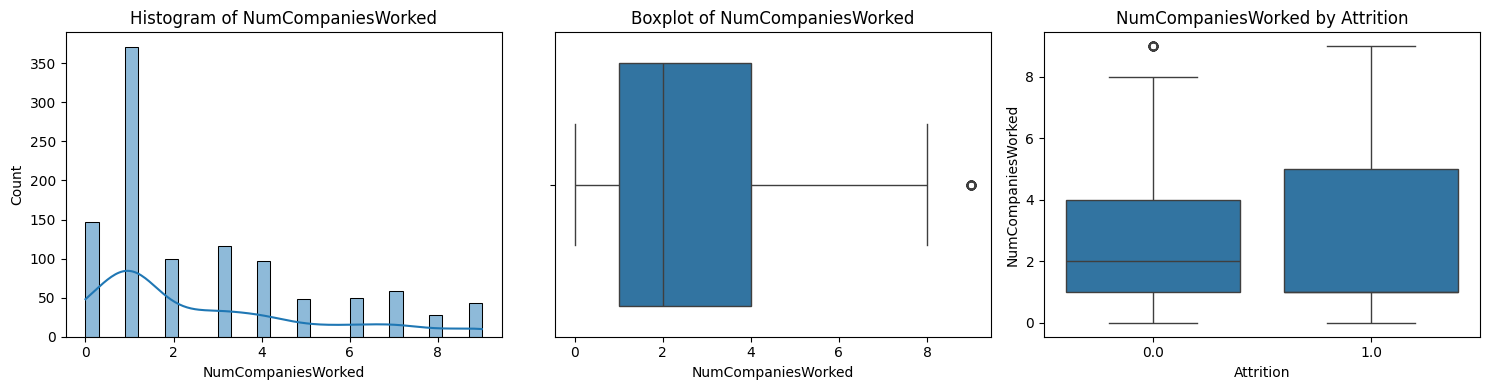

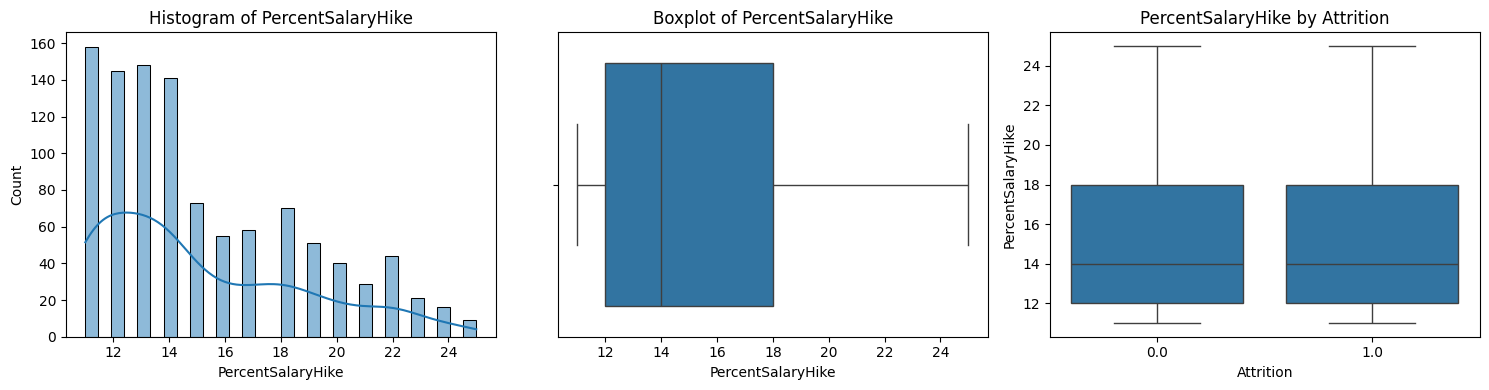

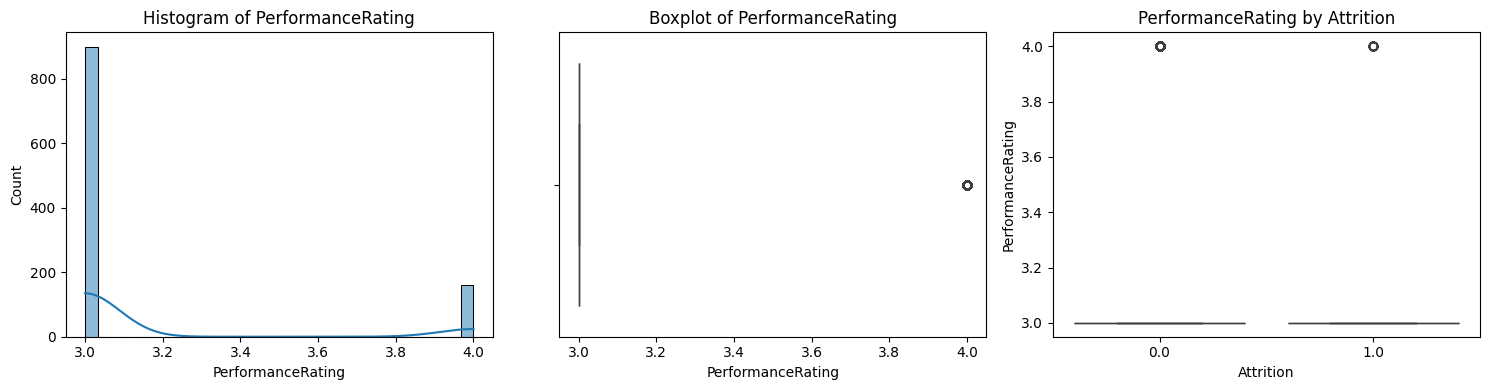

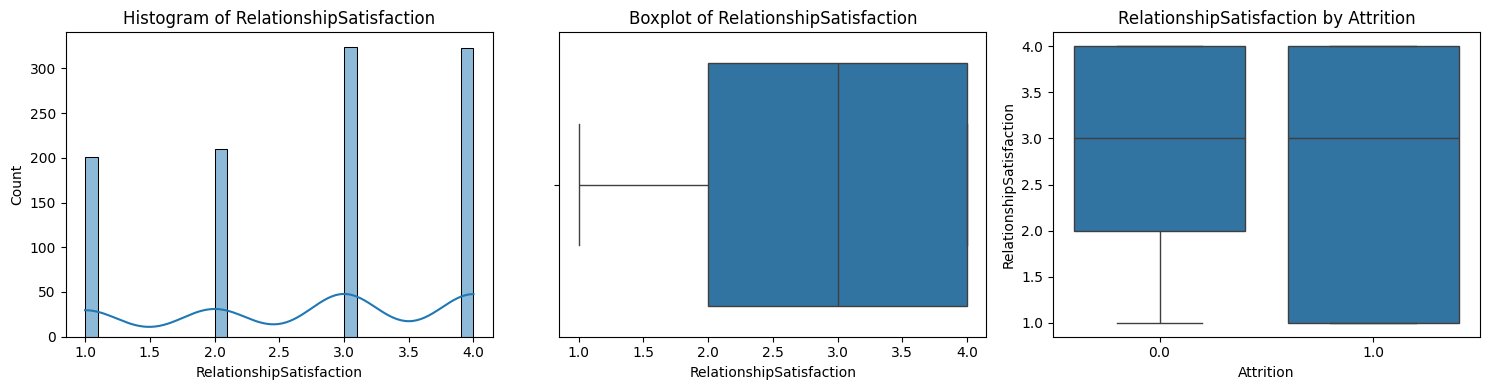

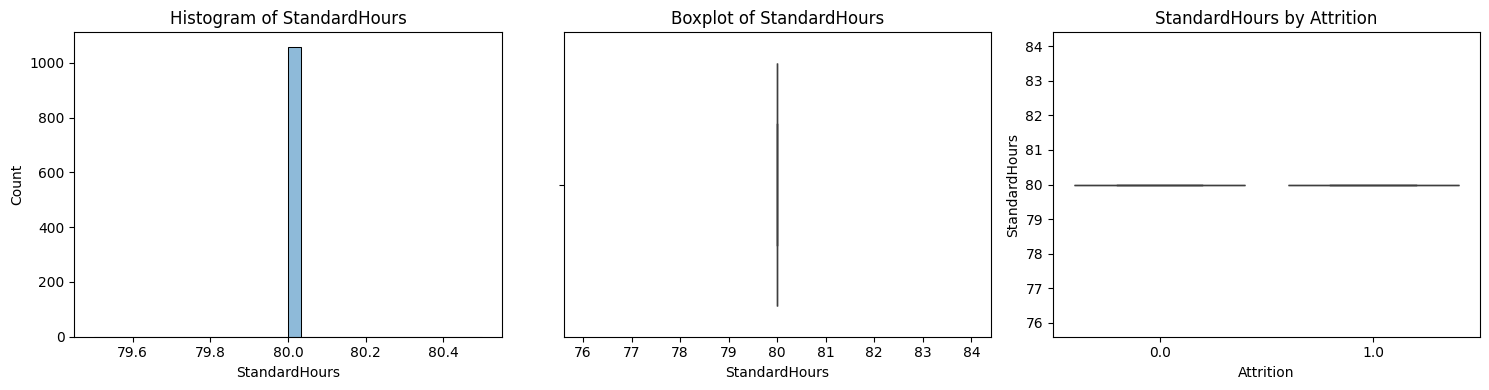

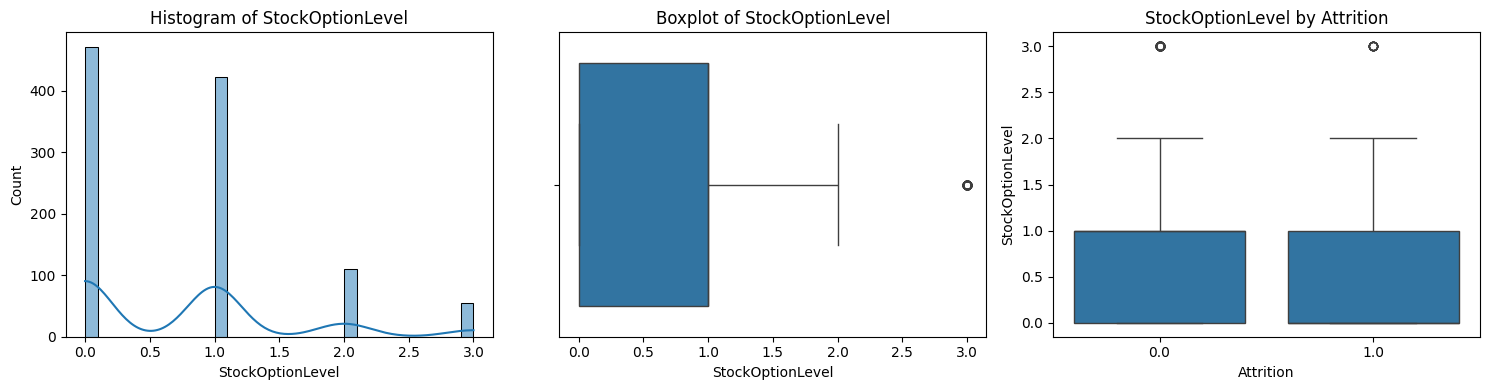

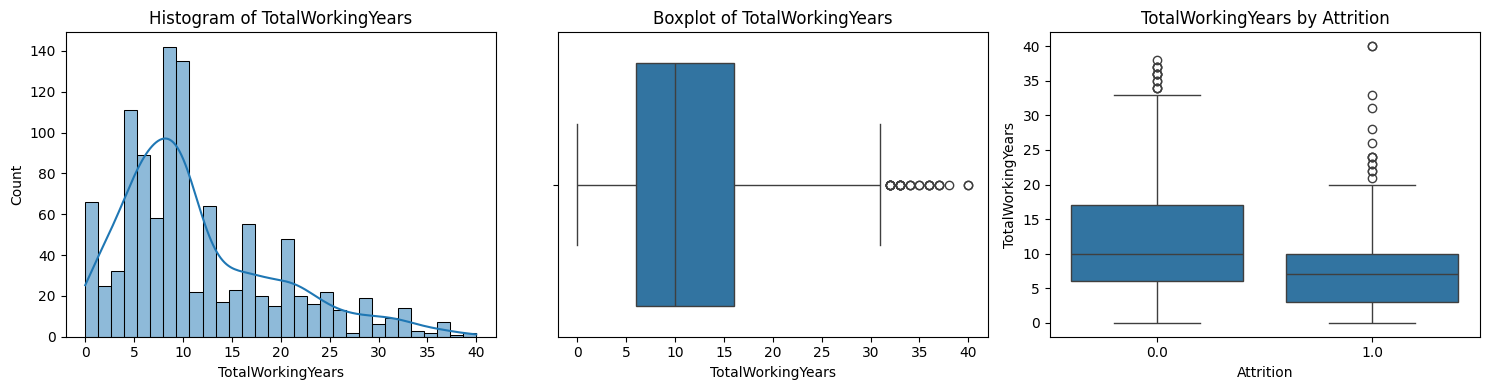

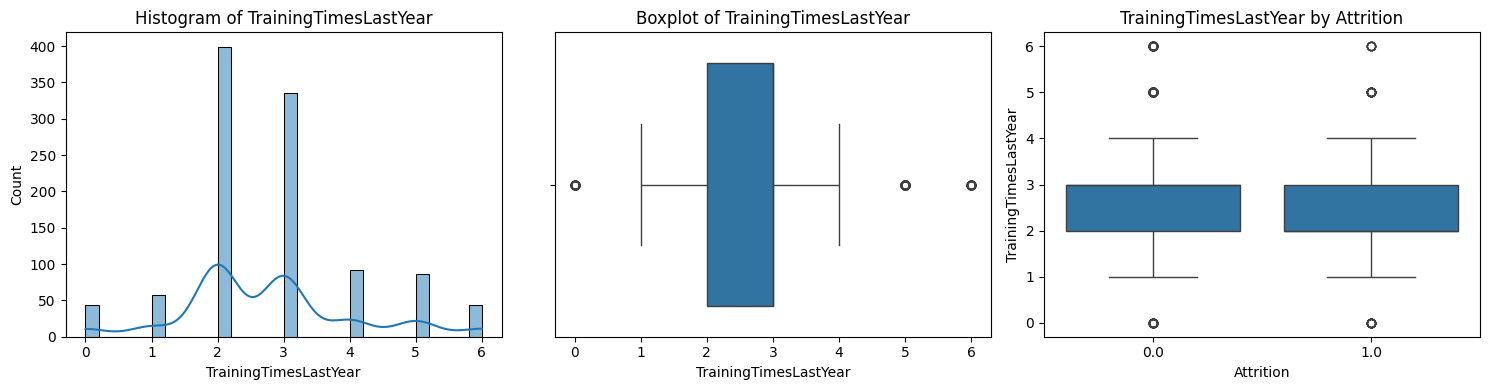

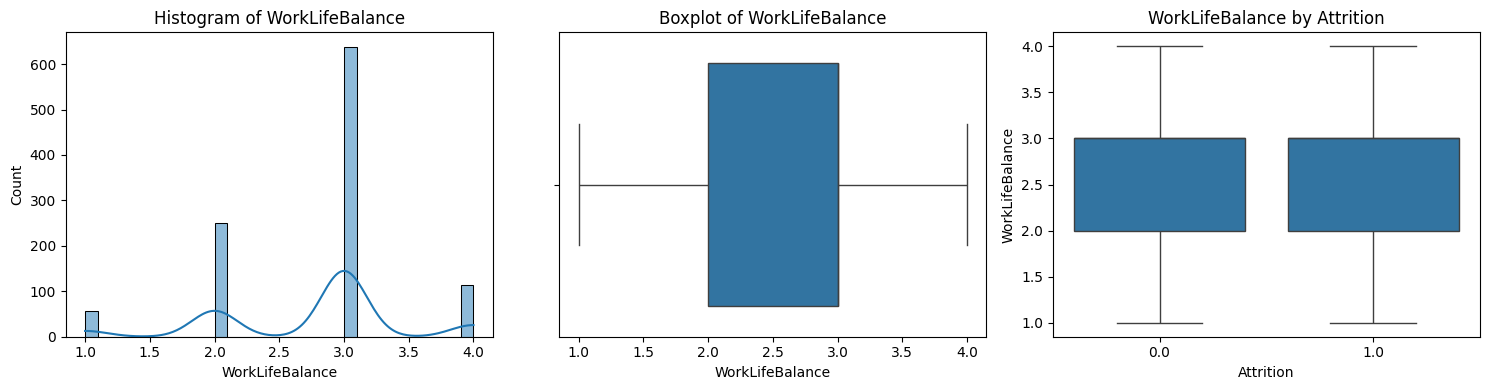

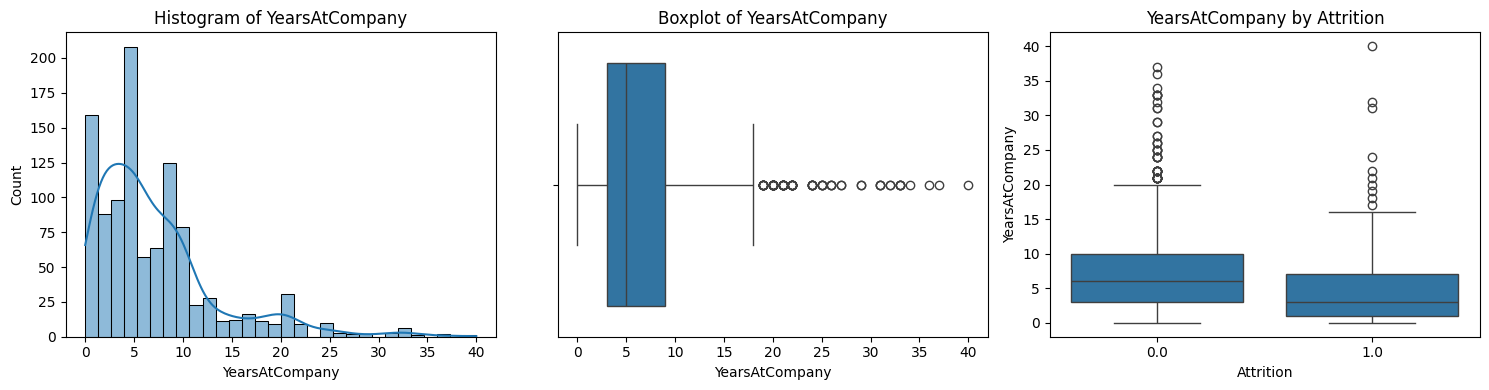

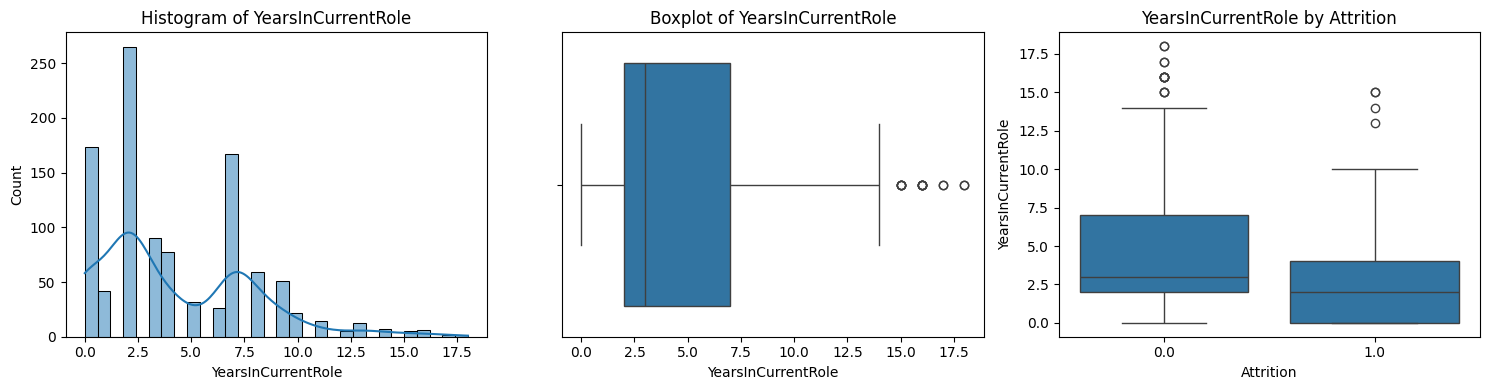

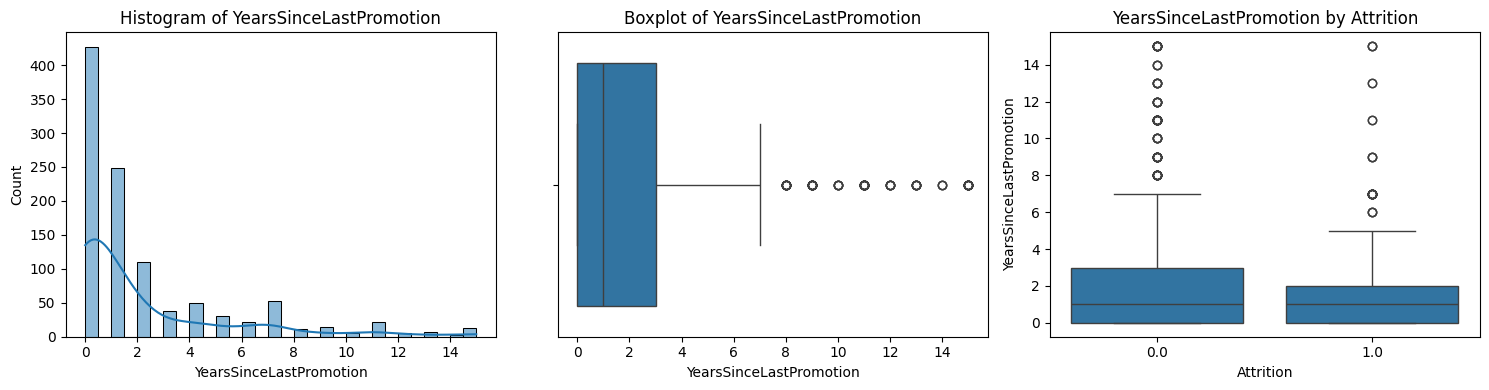

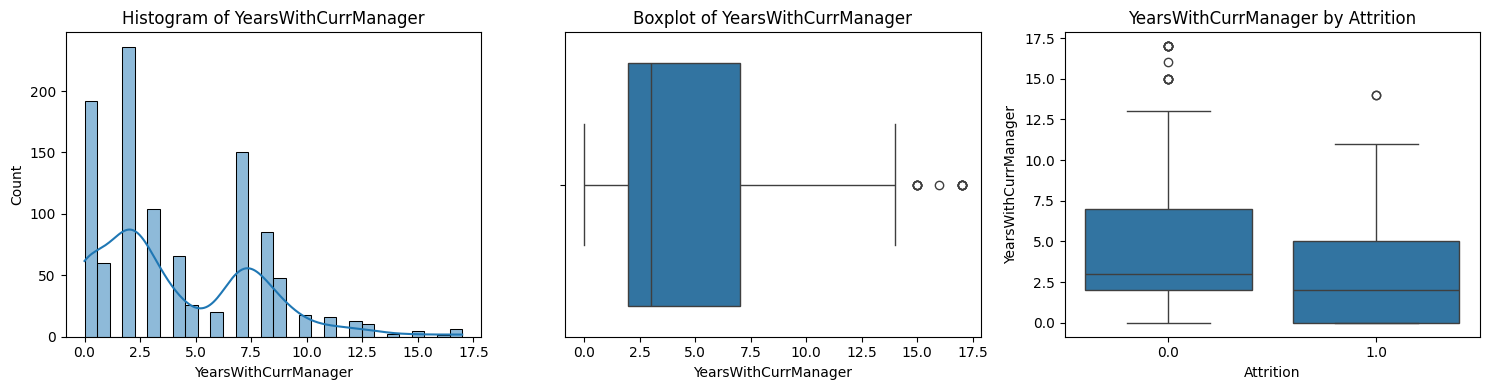

In [409]:
for feature in num_fe:
    numeric_analysis(data, feature, target="Attrition")


📊 Hasil Univariate Analysis – Faktor Attrition

Berdasarkan hasil analisis univariate terhadap fitur numerik, ditemukan beberapa pola penting terkait faktor Attrition:
- Orang yang melakukan attrition cenderung tidak puas dalam perkerjaan dan lingkungannya
- Orang yang melakukan attrition mayoritas berumur muda
- Mayoritas attrition terjadi pada Departemen Research & Development
- Manager baru juga menjadi faktor attrition dimana mayoritas attrition terjadi pada seseorang yang bekerja selama 0-5 tahun pada periode manager baru
- Pendapatan juga menjadi faktor attrition dimana pendapatan yang relative kecil lebih banyak melakukan attrition


kolom-kolom yang tidak memiliki pola berarti :
- Employeeld,JobInvolment,PercentSalaryHike,HourlyRate, EmployeeCount, EducatioN,WorkLifeBalance,TrainingTimesLastYears,StockOptionLevel,StandardHours,RelationshipSatisfaction,PeformanceRating,NumCompaniesWorked,MonthlyRate,DailyRate


## Feature Category

In [410]:
cat_fe = data.select_dtypes(exclude=np.number).columns
cat_fe

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

### Helper Function for Visualization (Category)

In [411]:
def categorical_analysis(df: pd.DataFrame, cat_features: list[str], target: str = None) -> None:
    """
    Helper function untuk melakukan univariate atau bivariate analysis pada fitur kategorikal.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame yang berisi dataset
    cat_features : list[str]
        List nama kolom kategorikal
    target : str, optional
        Kolom target (misalnya 'Attrition'), default None

    Return
    ------
    None
        Hanya menampilkan plot, summary, dan crosstab jika target disediakan
    """
    for col in cat_features:
        print(f"\n===== Analisis Fitur: {col} =====")
        print(df[col].value_counts(dropna=False))
        print("\nPersentase distribusi:")
        print(df[col].value_counts(normalize=True, dropna=False) * 100)

        if target is not None:
            print(f"\n>>> Perbandingan {col} terhadap {target}:")
            ctab = pd.crosstab(df[col], df[target], margins=True)
            print(ctab)

            print("\n>>> Persentase perbandingan (row %):")
            ctab_pct = pd.crosstab(df[col], df[target], normalize="index") * 100
            print(ctab_pct.round(2))

        plt.figure(figsize=(8,5))
        if target is None:
            sns.countplot(
                data=df,
                x=col,
                order=df[col].value_counts().index,
                palette="Set2"
            )
            plt.title(f"Distribusi {col}")
        else:
            sns.countplot(
                data=df,
                x=col,
                hue=target,
                order=df[col].value_counts().index,
                palette="Set2"
            )
            plt.title(f"Distribusi {col} berdasarkan {target}")

        plt.xticks(rotation=30)
        plt.show()



===== Analisis Fitur: BusinessTravel =====
BusinessTravel
Travel_Rarely        746
Travel_Frequently    205
Non-Travel           107
Name: count, dtype: int64

Persentase distribusi:
BusinessTravel
Travel_Rarely        70.510397
Travel_Frequently    19.376181
Non-Travel           10.113422
Name: proportion, dtype: float64

>>> Perbandingan BusinessTravel terhadap Attrition:
Attrition          0.0  1.0   All
BusinessTravel                   
Non-Travel          96   11   107
Travel_Frequently  154   51   205
Travel_Rarely      629  117   746
All                879  179  1058

>>> Persentase perbandingan (row %):
Attrition            0.0    1.0
BusinessTravel                 
Non-Travel         89.72  10.28
Travel_Frequently  75.12  24.88
Travel_Rarely      84.32  15.68


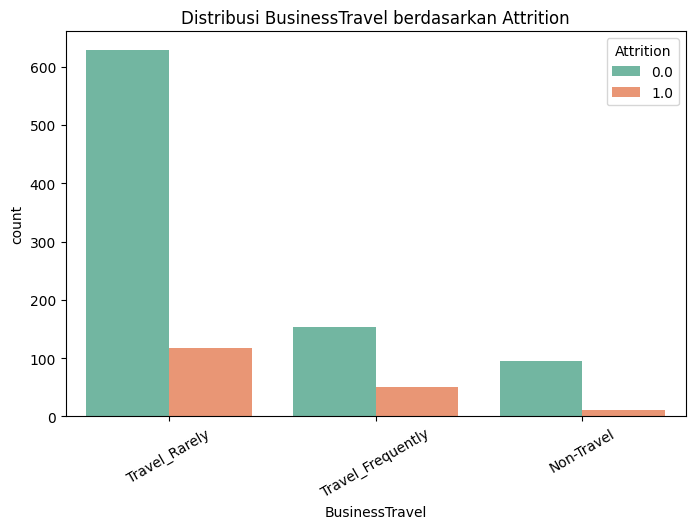


===== Analisis Fitur: Department =====
Department
Research & Development    701
Sales                     319
Human Resources            38
Name: count, dtype: int64

Persentase distribusi:
Department
Research & Development    66.257089
Sales                     30.151229
Human Resources            3.591682
Name: proportion, dtype: float64

>>> Perbandingan Department terhadap Attrition:
Attrition               0.0  1.0   All
Department                            
Human Resources          32    6    38
Research & Development  594  107   701
Sales                   253   66   319
All                     879  179  1058

>>> Persentase perbandingan (row %):
Attrition                 0.0    1.0
Department                          
Human Resources         84.21  15.79
Research & Development  84.74  15.26
Sales                   79.31  20.69


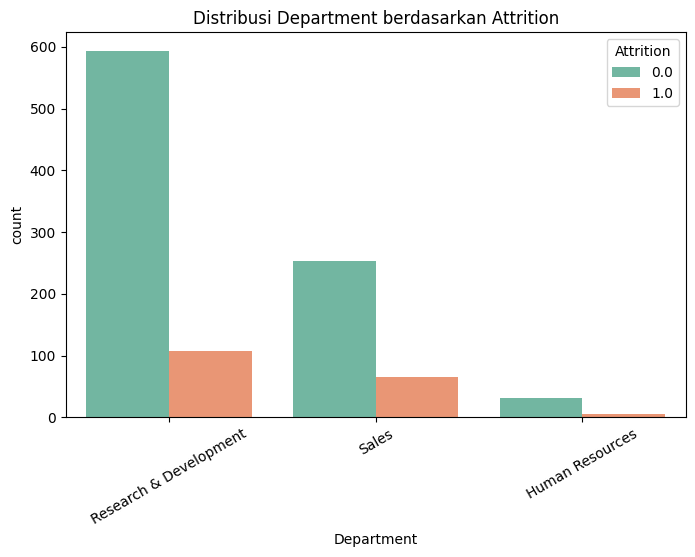


===== Analisis Fitur: EducationField =====
EducationField
Life Sciences       436
Medical             330
Marketing           122
Technical Degree     96
Other                59
Human Resources      15
Name: count, dtype: int64

Persentase distribusi:
EducationField
Life Sciences       41.209830
Medical             31.190926
Marketing           11.531191
Technical Degree     9.073724
Other                5.576560
Human Resources      1.417769
Name: proportion, dtype: float64

>>> Perbandingan EducationField terhadap Attrition:
Attrition         0.0  1.0   All
EducationField                  
Human Resources    13    2    15
Life Sciences     366   70   436
Marketing          96   26   122
Medical           284   46   330
Other              49   10    59
Technical Degree   71   25    96
All               879  179  1058

>>> Persentase perbandingan (row %):
Attrition           0.0    1.0
EducationField                
Human Resources   86.67  13.33
Life Sciences     83.94  16.06
Marketi

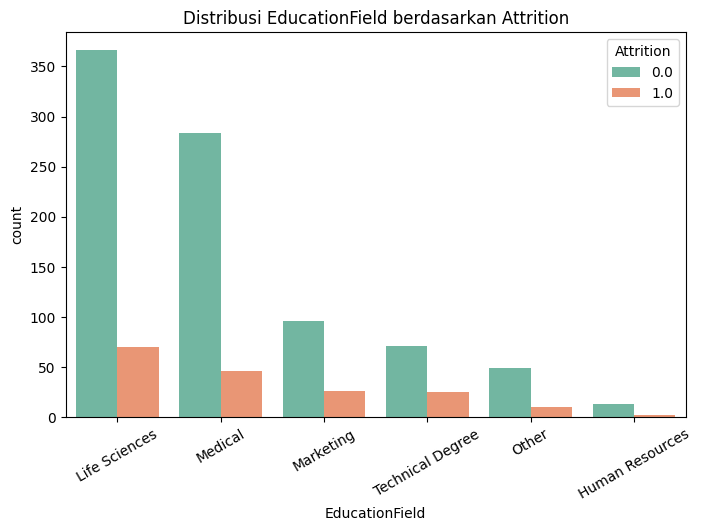


===== Analisis Fitur: Gender =====
Gender
Male      620
Female    438
Name: count, dtype: int64

Persentase distribusi:
Gender
Male      58.601134
Female    41.398866
Name: proportion, dtype: float64

>>> Perbandingan Gender terhadap Attrition:
Attrition  0.0  1.0   All
Gender                   
Female     367   71   438
Male       512  108   620
All        879  179  1058

>>> Persentase perbandingan (row %):
Attrition    0.0    1.0
Gender                 
Female     83.79  16.21
Male       82.58  17.42


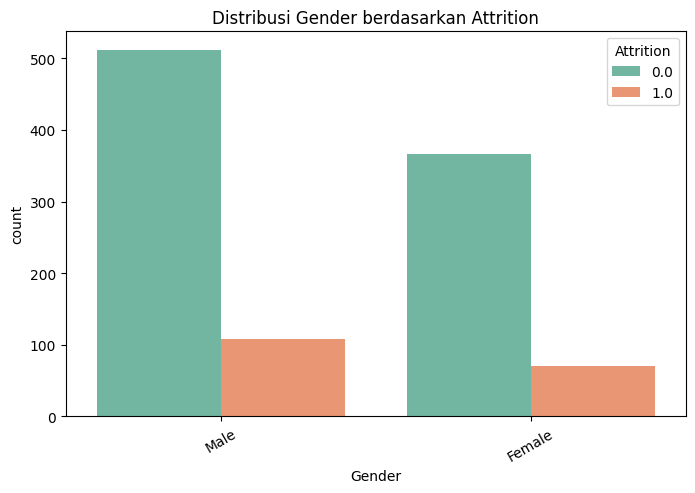


===== Analisis Fitur: JobRole =====
JobRole
Sales Executive              232
Research Scientist           214
Laboratory Technician        188
Manufacturing Director       107
Healthcare Representative     88
Manager                       79
Research Director             62
Sales Representative          58
Human Resources               30
Name: count, dtype: int64

Persentase distribusi:
JobRole
Sales Executive              21.928166
Research Scientist           20.226843
Laboratory Technician        17.769376
Manufacturing Director       10.113422
Healthcare Representative     8.317580
Manager                       7.466919
Research Director             5.860113
Sales Representative          5.482042
Human Resources               2.835539
Name: proportion, dtype: float64

>>> Perbandingan JobRole terhadap Attrition:
Attrition                  0.0  1.0   All
JobRole                                  
Healthcare Representative   80    8    88
Human Resources             24    6    30
La

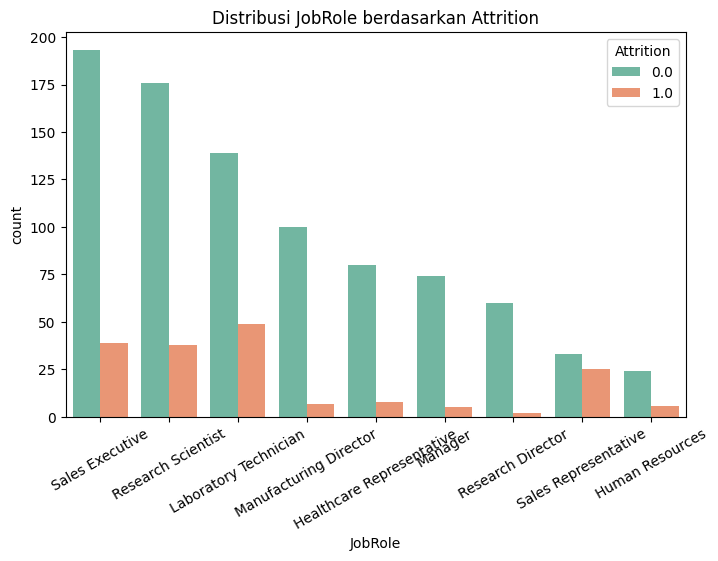


===== Analisis Fitur: MaritalStatus =====
MaritalStatus
Married     464
Single      352
Divorced    242
Name: count, dtype: int64

Persentase distribusi:
MaritalStatus
Married     43.856333
Single      33.270321
Divorced    22.873346
Name: proportion, dtype: float64

>>> Perbandingan MaritalStatus terhadap Attrition:
Attrition      0.0  1.0   All
MaritalStatus                
Divorced       219   23   242
Married        402   62   464
Single         258   94   352
All            879  179  1058

>>> Persentase perbandingan (row %):
Attrition        0.0    1.0
MaritalStatus              
Divorced       90.50   9.50
Married        86.64  13.36
Single         73.30  26.70


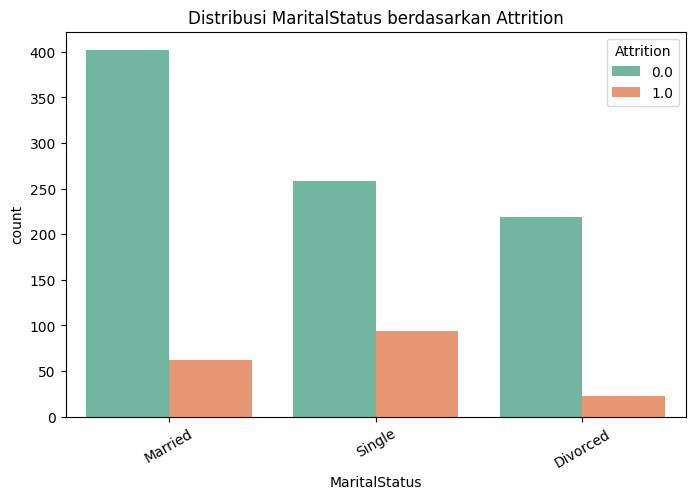


===== Analisis Fitur: Over18 =====
Over18
Y    1058
Name: count, dtype: int64

Persentase distribusi:
Over18
Y    100.0
Name: proportion, dtype: float64

>>> Perbandingan Over18 terhadap Attrition:
Attrition  0.0  1.0   All
Over18                   
Y          879  179  1058
All        879  179  1058

>>> Persentase perbandingan (row %):
Attrition    0.0    1.0
Over18                 
Y          83.08  16.92


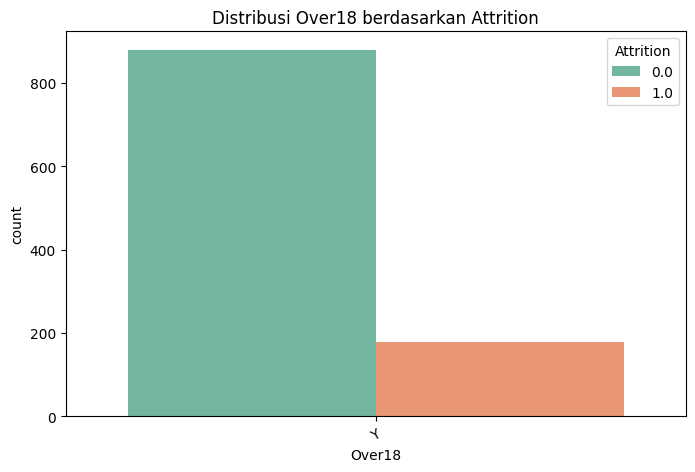


===== Analisis Fitur: OverTime =====
OverTime
No     751
Yes    307
Name: count, dtype: int64

Persentase distribusi:
OverTime
No     70.982987
Yes    29.017013
Name: proportion, dtype: float64

>>> Perbandingan OverTime terhadap Attrition:
Attrition  0.0  1.0   All
OverTime                 
No         670   81   751
Yes        209   98   307
All        879  179  1058

>>> Persentase perbandingan (row %):
Attrition    0.0    1.0
OverTime               
No         89.21  10.79
Yes        68.08  31.92


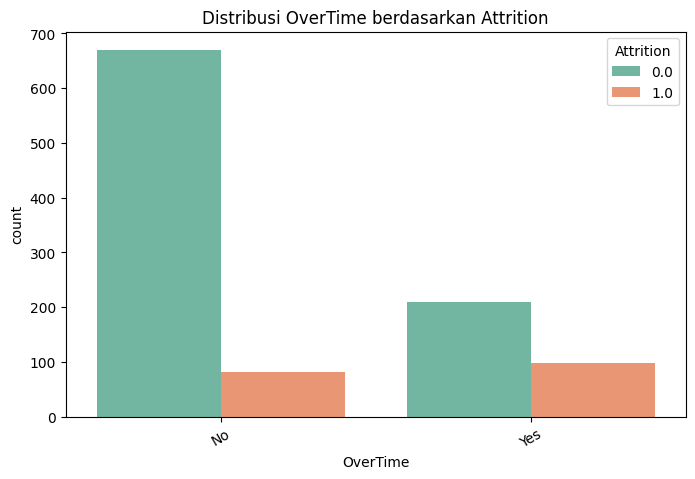

In [412]:
categorical_analysis(df=data, cat_features=cat_fe, target="Attrition")

📌 Kesimpulan Univariate dan bivariate Analysis (Fitur Kategorikal)

Berdasarkan analisis distribusi kategori terhadap Attrition, terdapat beberapa temuan penting:

1. BusinessTravel

- Karyawan dengan frekuensi perjalanan yang jarang justru menunjukkan tingkat attrition tertinggi (65%).
- Hal ini mengindikasikan bahwa kurangnya variasi atau kesempatan perjalanan bisa berhubungan dengan kejenuhan kerja.

2. Department

- Attrition paling banyak terjadi di Research & Development (59%), diikuti oleh Sales (37%).
- Kedua departemen ini mungkin memiliki beban kerja tinggi atau tingkat stres yang lebih besar dibanding departemen lain.

3. Gender

- Mayoritas karyawan yang attrition adalah laki-laki (60%).
- Faktor gender dapat menjadi salah satu aspek penting dalam retensi karyawan.

4. EducationField

- Tingkat attrition tertinggi ada pada bidang Life Sciences (39%) dan Medical (25%).
- Bisa jadi karena bidang ini memiliki karakteristik pekerjaan yang lebih menantang secara teknis maupun emosional.

5. JobRole

- Attrition dominan terjadi pada Laboratory Technician & Research Scientist (48%) serta role di bidang Sales (35%).
- Ini menunjukkan bahwa baik pekerjaan berbasis riset maupun sales sama-sama memiliki risiko attrition yang tinggi.

6. MaritalStatus

- Karyawan dengan status Single (52%) memiliki tingkat attrition tertinggi, diikuti oleh Married (34%).
- Status pernikahan tampaknya mempengaruhi stabilitas dan retensi karyawan.

7. OverTime

- Attrition paling tinggi terjadi pada karyawan yang sering lembur (54%).
- Hal ini menunjukkan bahwa beban kerja berlebih sangat mempengaruhi keputusan karyawan untuk keluar.

🎯 Insight Utama

- Faktor beban kerja (overtime, job role tertentu, dan department) tampaknya sangat berpengaruh terhadap keputusan karyawan untuk resign.

- Faktor personal seperti status pernikahan dan gender juga ikut memberi kontribusi pada tingkat attrition.

- Attrition lebih tinggi di bidang pekerjaan dengan tuntutan tinggi (R&D, Sales, Life Sciences, Medical).

### 📊 Kesimpulan Univariate Analysis (Numerik + Kategorikal)
1. Faktor Demografis & Karakteristik Personal

- Gender: Mayoritas karyawan yang mengalami attrition adalah laki-laki (~60%).
- Marital Status: Tingkat attrition lebih tinggi pada karyawan single (52%), dibanding married.
- Usia (numerik): Karyawan yang lebih muda (early career) cenderung memiliki tingkat attrition lebih tinggi.

👉 Interpretasi: Karyawan muda dan masih single cenderung lebih mobile, mencari pengalaman baru, atau kurang memiliki keterikatan terhadap perusahaan.

2. Faktor Pekerjaan (Role, Department, dan Beban Kerja)

- Department: Attrition dominan pada Research & Development (59%) dan Sales (37%).
- Job Role: Tingkat attrition tertinggi pada Laboratory Technician & Research Scientist (48%), serta role di bidang Sales (35%).
- OverTime: Karyawan dengan jam kerja lembur tinggi menyumbang attrition terbesar (54%).
- YearsAtCompany / YearsInCurrentRole (numerik): Attrition lebih tinggi pada karyawan dengan masa kerja singkat (<3 tahun).

👉 Interpretasi: Faktor beban kerja tinggi, tekanan di bidang R&D/Sales, serta masa kerja singkat merupakan indikator kuat terjadinya attrition.

3. Faktor Pendidikan & Perjalanan

- EducationField: Attrition banyak terjadi pada karyawan dari Life Sciences (39%) dan Medical (25%).
- BusinessTravel: Menariknya, karyawan yang jarang melakukan perjalanan justru menunjukkan tingkat attrition tertinggi (65%).

👉 Interpretasi: Bidang pekerjaan tertentu (Life Sciences, Medical) lebih rentan terhadap turnover. Kurangnya variasi atau kesempatan exposure (misalnya perjalanan bisnis) dapat memengaruhi kepuasan kerja.

4. Faktor Kompensasi & Benefit (Numerik)

- Monthly Income: Attrition lebih tinggi pada karyawan dengan gaji relatif rendah.
- StockOptionLevel: Karyawan dengan stock option rendah lebih banyak yang keluar dibandingkan mereka yang punya insentif lebih besar.
- JobSatisfaction & EnvironmentSatisfaction: Skor kepuasan rendah berhubungan dengan attrition yang lebih tinggi.

👉 Interpretasi: Faktor kompensasi dan kepuasan kerja berperan penting dalam retensi. Gaji rendah, insentif minim, serta kepuasan kerja yang rendah menjadi pemicu utama.

### Insight Utama (Big Picture)

- Attrition lebih tinggi pada karyawan muda, single, dengan kompensasi rendah, serta masa kerja singkat.

- Faktor pekerjaan seperti jam lembur, departemen/role dengan beban kerja tinggi (R&D, Sales), dan bidang studi tertentu (Life Sciences, Medical) memperbesar risiko attrition.

- Faktor kompensasi dan kepuasan kerja (income, stock options, job satisfaction) sangat memengaruhi keputusan karyawan untuk bertahan atau keluar.


👉 Jadi secara keseluruhan, attrition dipengaruhi kombinasi faktor personal, beban kerja, kompensasi, dan kepuasan kerja.
Artinya, strategi retensi harus menyasar pada:

- Kompensasi & insentif yang lebih adil,

- Mengelola beban kerja (terutama overtime),

- Program engagement untuk karyawan muda & single,

- Meningkatkan kepuasan kerja & lingkungan kerja.

In [413]:
data.drop(columns=['Over18'], inplace=True)

In [414]:
data.shape

(1058, 34)

## Data Preparation / Preprocessing

### Feature Selection

Berdasarkan hasil ekplorasi di atas didapatkan beberapa fitur yang memiliki hubungan atau keterkaitan dengan "Attrintion". Beberapa fitur tersebut akan digunakan untuk melakukan pendekatan machine learning.

Feature Selection
fitur numerik yang tidak dipilih:
- Employeeld, JobInvolment, PercentSalaryHike, HourlyRate, EmployeeCount, EducatioN, WorkLifeBalance, TrainingTimesLastYears, StockOptionLevel,StandardHours, RelationshipSatisfaction, PeformanceRating, NumCompaniesWorked,MonthlyRate, DailyRate



fitur Categorical yang tidak dipilih :
- EducationField, OverTime

Fitur yang dipilih sudah berdasarkan nilai korelasi dan hasil analisis univariate atau bivariate.



In [415]:
feature_selection_numeric = ['EmployeeId','JobInvolvement','PercentSalaryHike','HourlyRate','EmployeeCount','Education','WorkLifeBalance','TrainingTimesLastYear',
                             'StockOptionLevel','StandardHours','RelationshipSatisfaction','PerformanceRating','NumCompaniesWorked','MonthlyRate','DailyRate']
feature_selection_categorical = ['EducationField','OverTime']

In [416]:
data_selection = data.copy()
data_selection.drop(columns=feature_selection_numeric, inplace=True)
data_selection.drop(columns=feature_selection_categorical, inplace=True)


In [417]:
def calculate_vif(df: pd.DataFrame) -> pd.DataFrame:
    """
    Hitung Variance Inflation Factor (VIF) untuk mendeteksi multikolinearitas
    pada fitur numerik.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame berisi dataset numerik.

    Returns
    -------
    pd.DataFrame
        DataFrame berisi fitur dan nilai VIF masing-masing.
    """
    X = df.copy()

    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                       for i in range(X.shape[1])]

    return vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

In [418]:
vif_result = calculate_vif(data_selection.select_dtypes(np.number))
display(vif_result)


,feature,VIF
0,JobLevel,50.070561
1,MonthlyIncome,32.888349
2,Age,17.957487
3,TotalWorkingYears,12.421450
4,YearsAtCompany,9.771987
5,YearsInCurrentRole,6.625047
6,YearsWithCurrManager,6.310687
7,EnvironmentSatisfaction,6.237357
8,JobSatisfaction,6.043454
9,YearsSinceLastPromotion,2.453719


Dapat dilihat bahwa JobLevel dan beberapa fitur memiliki nilai VIF yang cukup tinggi, ini menjadi sinyal bahwa beberapa fitur memiliki multikolinearitas yang cukup tinggi.

## Spliting

In [419]:
X = data_selection.drop(columns=['Attrition'])
y = data_selection['Attrition']

# Lalu split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.1,
    random_state=42,
    shuffle=True
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

print(X_train.shape)
print(X_test.shape)

(952, 16) (106, 16) (952,) (106,)
(952, 16)
(106, 16)


### Feature Scalling dan encoding

In [420]:
def scaling(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            # joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))

            X_test = np.asanyarray(df_test[feature])
            X_test = X_test.reshape(-1,1)
            df_test["{}".format(feature)] = scaler.transform(X_test)
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            # joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))
        return df

def encoding(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(df[feature])
            df["{}".format(feature)] = encoder.transform(df[feature])
            # joblib.dump(encoder, "model/encoder_{}.joblib".format(feature))

            df_test["{}".format(feature)] = encoder.transform(df_test[feature])
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(df[feature])
            df["{}".format(feature)] = encoder.transform(df[feature])
            # joblib.dump(encoder, "model/encoder_{}.joblib".format(feature))
        return df

In [421]:
numerical_columns = X_train.select_dtypes(include=np.number)
categorical_columns = X_train.select_dtypes(include='object')

new_train_df, new_test_df = scaling(numerical_columns, X_train, X_test)
new_train_df, new_test_df = encoding(categorical_columns, new_train_df, new_test_df)

In [422]:
encoder = LabelEncoder()
encoder.fit(y_train)
new_y_train = encoder.transform(y_train)
# joblib.dump(encoder, "model/encoder_target.joblib")

new_y_test = encoder.transform(y_test)

## Oversampling with SMOTE

In [423]:
print("Sebelum oversampling:", Counter(new_y_train))

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Lakukan oversampling
X_train_res, y_train_res = smote.fit_resample(new_train_df, y_train)

print("Setelah oversampling:", Counter(y_train_res))

Sebelum oversampling: Counter({np.int64(0): 796, np.int64(1): 156})
Setelah oversampling: Counter({0.0: 796, 1.0: 796})


## PCA

In [424]:
train_pca_df = X_train_res.copy().reset_index(drop=True)
test_pca_df = new_test_df.copy().reset_index(drop=True)

In [425]:
colom_pca = ['Age','TotalWorkingYears','JobLevel','MonthlyIncome','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager','YearsSinceLastPromotion']

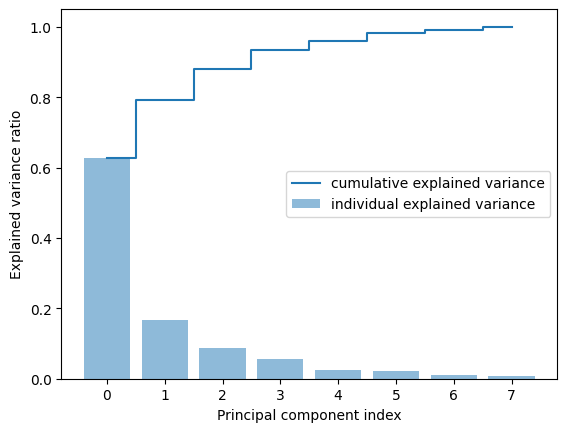

In [426]:
pca = PCA(n_components=len(colom_pca), random_state=123)
pca.fit(train_pca_df[colom_pca])
princ_comp = pca.transform(train_pca_df[colom_pca])

var_exp = pca.explained_variance_ratio_.round(3)
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(len(colom_pca)), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(colom_pca)), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

Dapat dilihat dengan menggunakan 3 fitur sudah menjelaskan lebih dari 80% dari keseluruhan fitur pca

In [427]:
pca_1 = PCA(n_components=3, random_state=123)
pca_1.fit(train_pca_df[colom_pca])
# joblib.dump(pca_1, "model/pca_{}.joblib".format(1))
princ_comp = pca_1.transform(train_pca_df[colom_pca])
train_pca_df[["pc1_1", "pc1_2", "pc1_3"]] = pd.DataFrame(princ_comp, columns=["pc1_1", "pc1_2", "pc1_3"])
train_pca_df.drop(columns=colom_pca, axis=1, inplace=True)
train_pca_df.head()

,BusinessTravel,Department,DistanceFromHome,EnvironmentSatisfaction,Gender,JobRole,JobSatisfaction,MaritalStatus,pc1_1,pc1_2,pc1_3
0,2,1,0.250000,0.666667,0,2,0.000000,1,-0.084346,-0.059068,0.452846
1,2,1,0.214286,1.000000,1,4,0.666667,0,0.442705,-0.145274,-0.000747
2,2,2,0.428571,0.333333,1,7,1.000000,0,-0.151260,-0.085673,-0.076533
3,2,1,0.357143,0.666667,0,3,0.333333,2,0.974342,-0.560721,-0.192936
4,1,1,0.071429,1.000000,0,6,0.666667,1,-0.205320,0.167595,0.092058


In [428]:
test_pca = pca_1.transform(test_pca_df[colom_pca])
test_pca_df[["pc1_1", "pc1_2", "pc1_3"]] = pd.DataFrame(test_pca, columns=["pc1_1", "pc1_2", "pc1_3"])
test_pca_df.drop(columns=colom_pca, axis=1, inplace=True)
test_pca_df.head()

,BusinessTravel,Department,DistanceFromHome,EnvironmentSatisfaction,Gender,JobRole,JobSatisfaction,MaritalStatus,pc1_1,pc1_2,pc1_3
0,1,2,0.500000,1.000000,1,7,1.000000,1,-0.023248,-0.186391,0.109964
1,2,2,0.928571,0.333333,0,7,1.000000,1,0.232932,0.066750,-0.282656
2,2,1,0.285714,0.000000,1,6,1.000000,1,0.126245,0.562874,0.114588
3,2,2,0.250000,1.000000,1,8,0.333333,1,-0.198063,-0.096197,0.381540
4,2,1,0.178571,1.000000,1,2,0.000000,1,-0.276556,-0.003188,0.209331


## Modeling

In [ ]:
joblib.dump(train_pca_df, 'data_train.joblib')
joblib.dump(y_train_res, '')

### LogisticRegression

In [430]:
param_grid = {
    "penalty": ["l1","l2"],
    "C": [0.01, 0.1, 1]
}

log_model = LogisticRegression(random_state=123)

CV_lr = GridSearchCV(estimator=log_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_lr.fit(train_pca_df, y_train_res)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=123), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l1', 'l2']})

In [431]:
print(f"best param : {CV_lr.best_params_}")

best param : {'C': 1, 'penalty': 'l2'}


In [433]:
log_model = LogisticRegression(penalty='l2', C=1)
log_model.fit(train_pca_df, y_train_res)

LogisticRegression(C=1)

### DecisionTree

In [434]:
tree_model = DecisionTreeClassifier(random_state=123)

param_grid = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5, 6, 7, 8],
    'criterion' :['gini', 'entropy']
}

CV_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_tree.fit(train_pca_df, y_train_res)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [435]:
print("best parameters: ", CV_tree.best_params_)

best parameters:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt'}


In [436]:
tree_model = DecisionTreeClassifier(
    random_state=123,
    criterion='gini',
    max_depth=8,
    max_features='sqrt'
)

tree_model.fit(train_pca_df, y_train_res)

DecisionTreeClassifier(max_depth=8, max_features='sqrt', random_state=123)

### RandomForest

In [437]:
rdf_model = RandomForestClassifier(random_state=123)

param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [6, 7, 8],
    'criterion' :['gini', 'entropy']
}

CV_rdf = GridSearchCV(estimator=rdf_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_rdf.fit(train_pca_df, y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [438]:
print("best parameters: ", CV_rdf.best_params_)

best parameters:  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}


In [440]:
rdf_model = RandomForestClassifier(
    random_state=123,
    max_depth=8,
    n_estimators=200,
    max_features='sqrt',
    criterion='entropy',
    n_jobs=-1
)
rdf_model.fit(train_pca_df, y_train_res)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=200,
                       n_jobs=-1, random_state=123)

## Evaluation

In [441]:
def evaluating(y_pred, y_true):
    """
    Evaluasi model:
    - Confusion Matrix (visualisasi heatmap)
    - Classification Report (precision, recall, f1, support)
    """
    # Ambil label unik langsung dari data
    labels = sorted(list(set(y_true)))

    # --- Confusion Matrix ---
    cnf_matrix = confusion_matrix(y_true, y_pred, labels=labels)
    confusion_matrix_df = pd.DataFrame(cnf_matrix, index=labels, columns=labels)

    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix_df, annot=True, fmt='d', cmap='YlGnBu')
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)
    plt.title("Confusion Matrix", fontsize=14)
    plt.show()

    # --- Classification Report ---
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=[str(l) for l in labels]))

    return confusion_matrix_df

### LogisticRegression

In [442]:
y_pred_test = log_model.predict(test_pca_df)

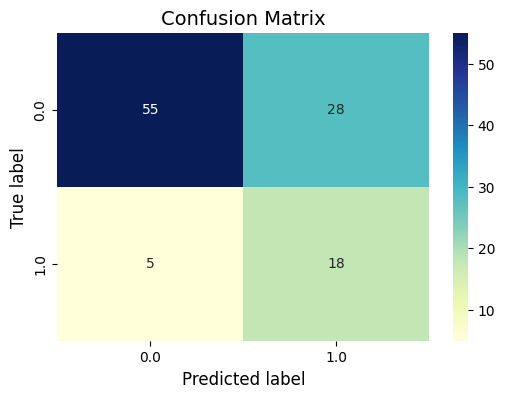


Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.66      0.77        83
         1.0       0.39      0.78      0.52        23

    accuracy                           0.69       106
   macro avg       0.65      0.72      0.65       106
weighted avg       0.80      0.69      0.72       106



,0.0,1.0
0.0,55,28
1.0,5,18


In [443]:
evaluating(y_pred=y_pred_test, y_true=y_test)

### Tree Model

In [444]:
y_pred_test = tree_model.predict(test_pca_df)

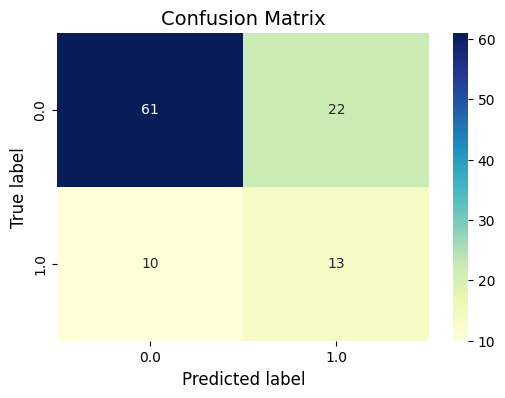


Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.73      0.79        83
         1.0       0.37      0.57      0.45        23

    accuracy                           0.70       106
   macro avg       0.62      0.65      0.62       106
weighted avg       0.75      0.70      0.72       106



,0.0,1.0
0.0,61,22
1.0,10,13


In [445]:
evaluating(y_pred=y_pred_test, y_true=y_test)

### RandomForest

In [446]:
y_pred_test = rdf_model.predict(test_pca_df)

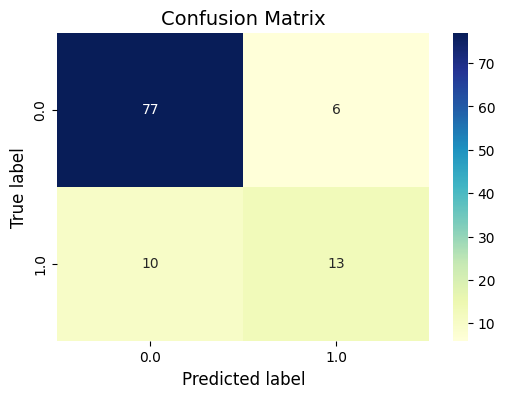


Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91        83
         1.0       0.68      0.57      0.62        23

    accuracy                           0.85       106
   macro avg       0.78      0.75      0.76       106
weighted avg       0.84      0.85      0.84       106



,0.0,1.0
0.0,77,6
1.0,10,13


In [447]:
evaluating(y_pred=y_pred_test, y_true=y_test)

In [451]:
joblib.dump(rdf_model, 'model.joblib')

['model.joblib']

In [453]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Setelah training model
y_pred = rdf_model.predict(test_pca_df)
y_prob = rdf_model.predict_proba(test_pca_df)[:, 1]

# Simpan semua hasil evaluasi
evaluation_results = {
    'classification_report': classification_report(y_test, y_pred, output_dict=True),
    'accuracy': accuracy_score(y_test, y_pred),
    'y_true': y_test.tolist(),
    'y_pred': y_pred.tolist(),
    'y_prob': y_prob.tolist(),
    'feature_names': test_pca_df.columns.tolist(),
    'confusion_matrix': confusion_matrix(y_test, y_pred).tolist()
}

# Simpan ke file
joblib.dump(evaluation_results, 'model_evaluation.joblib')

['model_evaluation.joblib']